# **Data Analysis in Python**

Preparing data for analysis by preprocessing it is typically the focus of the majority of data science work. This presentation will explain the process of turning our unprocessed data into precise insights. This notebook will teach you how to:

* Utilize `pandas` to import data, then use basic functions to identify issues with the data.
* Use `seaborn` to visualise missing and out-of-range data.
* Use a variety of data cleaning techniques to give reliable insights.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the data from a csv to a pandas dataframe
df = pd.read_csv('used_cars.csv')

## **Data Preprocessing**

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following:

- `.head()` prints the header of a DataFrame
- `.shape` prints shape of the DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isnull().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.nunique()` finds the number of unique values in a DataFrame column
- `.dropna()` drops rows with null values in the DataFrame


We can already identify a number of potential issues down the road by simply looking at the data, such as:


### Some common data problems:

- **Problem 1**: We can see that the dataset contains outliers; in this section, we'll look at one method for dealing with them.

- **Problem 2**: We can see that several columns lack data (missing data), and later on we'll be able to examine that from a higher perspective.


Checking the head of the data

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


checking the shape of the dataset

In [ ]:
df.shape

(2000, 26)

Some statistical inference from the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2000 non-null   int64  
 1   url           2000 non-null   object 
 2   region        2000 non-null   object 
 3   region_url    2000 non-null   object 
 4   price         2000 non-null   int64  
 5   year          1951 non-null   float64
 6   manufacturer  1830 non-null   object 
 7   model         1960 non-null   object 
 8   condition     1122 non-null   object 
 9   cylinders     1258 non-null   object 
 10  fuel          1939 non-null   object 
 11  odometer      1961 non-null   float64
 12  title_status  1870 non-null   object 
 13  transmission  1972 non-null   object 
 14  VIN           1268 non-null   object 
 15  drive         1363 non-null   object 
 16  size          493 non-null    object 
 17  type          1380 non-null   object 
 18  paint_color   1534 non-null 

In [ ]:
df.describe() #Numerical data

,id,price,year,odometer,county,lat,long
count,2.000000e+03,2.000000e+03,1951.000000,1.961000e+03,0.0,1961.000000,1961.000000
mean,7.308532e+09,5.627870e+05,2011.197335,2.039772e+05,NaN,33.737370,-85.550905
std,1.150432e+07,2.219596e+07,9.704956,9.918244e+05,NaN,2.166677,3.375837
min,7.208550e+09,0.000000e+00,1903.000000,0.000000e+00,NaN,26.021800,-122.693000
25%,7.305753e+09,5.500000e+03,2008.000000,2.965200e+04,NaN,32.922900,-86.817617
50%,7.310400e+09,1.710000e+04,2013.000000,8.800000e+04,NaN,33.455361,-86.737847
75%,7.313504e+09,2.998200e+04,2017.000000,1.573050e+05,NaN,33.736760,-85.480000
max,7.316878e+09,9.876543e+08,2021.000000,9.999999e+06,NaN,44.120200,-73.572300


In [ ]:
df.describe(include=['O']) #Categorical data

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,2000,2000,2000,1830,1960,1122,1258,1939,1870,1972,1268,1363,493,1380,1534,1973,1973,2000,1973
unique,2000,15,15,37,862,5,8,5,5,3,931,3,4,13,12,1511,1698,12,1914
top,https://prescott.craigslist.org/cto/d/prescott...,birmingham,https://bham.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,2G4WD582061211256,fwd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WIT...,al,2021-04-08T10:08:47-0500
freq,1,1647,1647,388,29,704,537,1615,1825,1441,5,507,358,362,564,45,13,1973,4


In [ ]:
df.nunique(axis=0) #Number of unique values in each column

,0
id,2000
url,2000
region,15
region_url,15
price,646
year,63
manufacturer,37
model,862
condition,5
cylinders,8


Checking for null values

In [ ]:
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,49
manufacturer,170
model,40
condition,878
cylinders,742


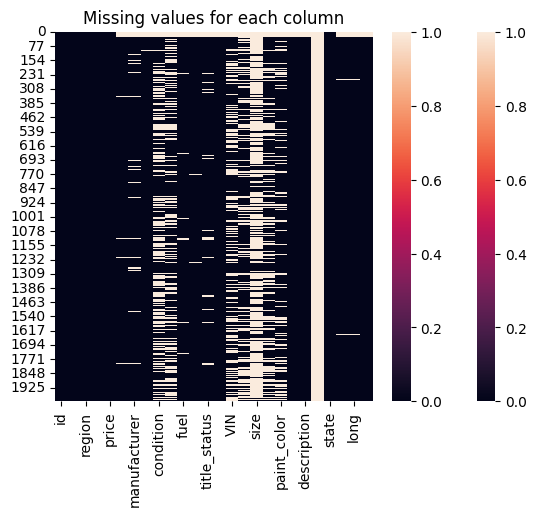

In [ ]:
# Visualize missing values using heatmap
sns.heatmap(df.isnull())
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

Printing the number of outliers and Nan values

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df

,id,price,year,odometer,county,lat,long
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1995,7309035025,2000,2005.0,165000.0,NaN,31.408000,-85.603000
1996,7308972392,17860,2014.0,108321.0,NaN,29.801374,-82.531052
1997,7308971633,54488,2020.0,5459.0,NaN,29.802119,-82.529850
1998,7308831024,33990,2017.0,17033.0,NaN,31.230000,-85.400000


In [ ]:
categorical_df = df.select_dtypes(include='object')
categorical_df

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
0,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,https://dothan.craigslist.org/cto/d/ozark-2005...,dothan,https://dothan.craigslist.org,ford,five hundred,good,6 cylinders,gas,clean,automatic,NaN,fwd,full-size,sedan,black,https://images.craigslist.org/01212_718RdXaGws...,"4 door, 6 cylinder, black, everything works, a...",al,2021-04-18T19:52:18-0500
1996,https://dothan.craigslist.org/ctd/d/alachua-20...,dothan,https://dothan.craigslist.org,jeep,grand cherokee limited,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_ijP2Qx9vMi...,2014 JEEP GRAND CHEROKEE LIMITED ~ Hundreds of...,al,2021-04-18T17:15:59-0500
1997,https://dothan.craigslist.org/ctd/d/alachua-20...,dothan,https://dothan.craigslist.org,ford,f-150 lariat 4wd,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00U0U_dTOexEOB2l...,2020 FORD F-150 LARIAT 4WD / F150 4X4 TRUCK ~ ...,al,2021-04-18T17:14:22-0500
1998,https://dothan.craigslist.org/ctd/d/dothan-201...,dothan,https://dothan.craigslist.org,ram,1500 crew cab tradesman,good,8 cylinders,gas,clean,other,3C6RR7KT7HG794054,4wd,NaN,pickup,blue,https://images.craigslist.org/00Y0Y_jRbwm0dSjS...,Carvana is the safer way to buy a car During t...,al,2021-04-18T12:50:51-0500


In [ ]:
for (columnName, columnData) in numeric_df.items():
   avg = columnData.mean()
   std_dev = columnData.std()
   print('Column Name : ', columnName)
   print('Number of NUll values : ', columnData.isnull().sum())
   print('Number of Outliers : ',((columnData < (avg - 2 * std_dev)) |(columnData > (avg + 2 * std_dev))).sum())
   print("-----------------------------")

Column Name :  id
Number of NUll values :  0
Number of Outliers :  27
-----------------------------
Column Name :  price
Number of NUll values :  0
Number of Outliers :  2
-----------------------------
Column Name :  year
Number of NUll values :  49
Number of Outliers :  61
-----------------------------
Column Name :  odometer
Number of NUll values :  39
Number of Outliers :  21
-----------------------------
Column Name :  county
Number of NUll values :  2000
Number of Outliers :  0
-----------------------------
Column Name :  lat
Number of NUll values :  39
Number of Outliers :  143
-----------------------------
Column Name :  long
Number of NUll values :  39
Number of Outliers :  144
-----------------------------


**Removing the outliers**

Checking for outliers for columns containing numerical values

Returns a matrix containing only True or False values

In [ ]:
avg = numeric_df.mean()
std_dev = numeric_df.std()
outlier_df = ((numeric_df < (avg - 2 * std_dev)) |(numeric_df > (avg + 2 * std_dev)))
outlier_df

,id,price,year,odometer,county,lat,long
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


Merging the first three columns with the matrix and

Appending the number of outliers in each row into a list


In [ ]:
final_df = pd.concat([categorical_df, outlier_df], axis=1)
outliers_in_rows = []
for index,row in outlier_df.iterrows():
   outliers_in_rows.append(row.sum())

print(len(outliers_in_rows))

2000


Retaining the rows which contain 0 outliers

In [ ]:
#creating new column with the name value
final_df['value'] = outliers_in_rows
final_df_without_outliers= final_df.loc[final_df['value'] == 0]
print(final_df_without_outliers.shape)

(1741, 27)


In [ ]:
final_df.head()

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,...,state,posting_date,id,price,year,odometer,county,lat,long,value
0,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,az,NaN,True,False,False,False,False,False,False,1
1,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ar,NaN,True,False,False,False,False,False,False,1
2,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fl,NaN,True,False,False,False,False,False,False,1
3,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ma,NaN,True,False,False,False,False,False,False,1
4,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nc,NaN,True,False,False,False,False,False,False,1


In [ ]:
final_df_without_outliers.head()

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,...,state,posting_date,id,price,year,odometer,county,lat,long,value
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,clean,other,...,al,2021-05-04T12:31:18-0500,False,False,False,False,False,False,False,0
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,chevrolet,silverado 1500,good,8 cylinders,gas,clean,other,...,al,2021-05-04T12:31:08-0500,False,False,False,False,False,False,False,0
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,chevrolet,silverado 1500 crew,good,8 cylinders,gas,clean,other,...,al,2021-05-04T12:31:25-0500,False,False,False,False,False,False,False,0
30,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,toyota,tundra double cab sr,good,8 cylinders,gas,clean,other,...,al,2021-05-04T10:41:31-0500,False,False,False,False,False,False,False,0
31,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,ford,f-150 xlt,excellent,6 cylinders,gas,clean,automatic,...,al,2021-05-03T14:02:03-0500,False,False,False,False,False,False,False,0


Replacing the all-False matrix by it's original values.

In [ ]:
final_df_outliers = final_df.loc[final_df['value'] != 0]
arr = []
for i,r in final_df_outliers.iterrows():
   arr.append(i)
df_without_outliers = df.drop(df.index[arr])

In [ ]:
df_without_outliers.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


**Missing values**

In [ ]:
total_missing_values = df_without_outliers.isnull().sum()
missing_values_per_column = df_without_outliers.isnull().sum()/df_without_outliers.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per_column], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
print(null_values)

              total_null  total_null_perc
county              1741         1.000000
size                1376         0.790350
condition            798         0.458357
cylinders            654         0.375646
VIN                  608         0.349225
drive                560         0.321654
type                 516         0.296381
paint_color          397         0.228030
title_status         103         0.059161
manufacturer         103         0.059161
fuel                  34         0.019529
year                  22         0.012636
lat                   12         0.006893
long                  12         0.006893
odometer              11         0.006318
model                  5         0.002872
description            0         0.000000
state                  0         0.000000
id                     0         0.000000
transmission           0         0.000000
image_url              0         0.000000
url                    0         0.000000
price                  0         0

In [ ]:
NA_val = df_without_outliers.isna().sum();
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_without_outliers.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_without_outliers[na_filter(NA_val)]
print(df_cleaned.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')


In [ ]:
print(len(df_without_outliers.columns),len(df_cleaned.columns))

26 23


In [ ]:
df_cleaned = df_cleaned.copy().drop(['id','model'],axis=1)
print(df_cleaned.shape)

(1741, 21)


In [ ]:
# Lower Bound: (Q1 - 1.5 * IQR)
# Upper Bound: (Q3 + 1.5 * IQR)
df['odometer'].describe()

,odometer
count,1.961000e+03
mean,2.039772e+05
std,9.918244e+05
min,0.000000e+00
25%,2.965200e+04
50%,8.800000e+04
75%,1.573050e+05
max,9.999999e+06


In [ ]:
df_cleaned = df_cleaned[df_cleaned['year'].between(1900, 2020)]
df_cleaned = df_cleaned[df_cleaned['odometer'].between(0, 348784.5)] # = 157305 + 1.5 * (157305-29692)
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 250000)];

In [ ]:
df_cleaned.isnull().sum()

,0
url,0
region,0
region_url,0
price,0
year,0
manufacturer,47
cylinders,598
fuel,32
odometer,0
title_status,96


In [ ]:
mode2 = df_cleaned["drive"].mode().values[0];
mode3= df_cleaned["type"].mode().values[0];
mode4= df_cleaned["fuel"].mode().values[0];

df_cleaned["drive"]=df_cleaned["drive"].replace(np.nan,mode2);
df_cleaned["type"]=df_cleaned["type"].replace(np.NaN,mode3);
df_cleaned["fuel"]=df_cleaned["fuel"].replace(np.nan,mode4);
df_cleaned

,url,region,region_url,price,year,manufacturer,cylinders,fuel,odometer,title_status,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,8 cylinders,gas,57923.0,clean,...,3GTP1VEC4EG551563,fwd,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,8 cylinders,gas,71229.0,clean,...,1GCSCSE06AZ123805,fwd,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,8 cylinders,gas,19160.0,clean,...,3GCPWCED5LG130317,fwd,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,8 cylinders,gas,41124.0,clean,...,5TFRM5F17HX120972,fwd,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
31,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,6 cylinders,gas,128000.0,clean,...,NaN,rwd,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,https://dothan.craigslist.org/ctd/d/new-brockt...,dothan,https://dothan.craigslist.org,4000,2007.0,cadillac,8 cylinders,gas,141000.0,clean,...,NaN,rwd,sedan,grey,https://images.craigslist.org/00G0G_4LVl47viLZ...,Up for sale is a 2007 Cadillac DTS Runs Good w...,al,31.369000,-85.940400,2021-04-18T20:05:44-0500
1995,https://dothan.craigslist.org/cto/d/ozark-2005...,dothan,https://dothan.craigslist.org,2000,2005.0,ford,6 cylinders,gas,165000.0,clean,...,NaN,fwd,sedan,black,https://images.craigslist.org/01212_718RdXaGws...,"4 door, 6 cylinder, black, everything works, a...",al,31.408000,-85.603000,2021-04-18T19:52:18-0500
1996,https://dothan.craigslist.org/ctd/d/alachua-20...,dothan,https://dothan.craigslist.org,17860,2014.0,jeep,NaN,gas,108321.0,clean,...,NaN,fwd,sedan,NaN,https://images.craigslist.org/00O0O_ijP2Qx9vMi...,2014 JEEP GRAND CHEROKEE LIMITED ~ Hundreds of...,al,29.801374,-82.531052,2021-04-18T17:15:59-0500
1997,https://dothan.craigslist.org/ctd/d/alachua-20...,dothan,https://dothan.craigslist.org,54488,2020.0,ford,NaN,gas,5459.0,clean,...,NaN,fwd,sedan,NaN,https://images.craigslist.org/00U0U_dTOexEOB2l...,2020 FORD F-150 LARIAT 4WD / F150 4X4 TRUCK ~ ...,al,29.802119,-82.529850,2021-04-18T17:14:22-0500


In [ ]:
print(df_cleaned.isnull().sum())

url               0
region            0
region_url        0
price             0
year              0
manufacturer     47
cylinders       598
fuel              0
odometer          0
title_status     96
transmission      0
VIN             497
drive             0
type              0
paint_color     354
image_url         0
description       0
state             0
lat               4
long              4
posting_date      0
dtype: int64


In [ ]:
df_cleaned=df_cleaned.dropna().reset_index()

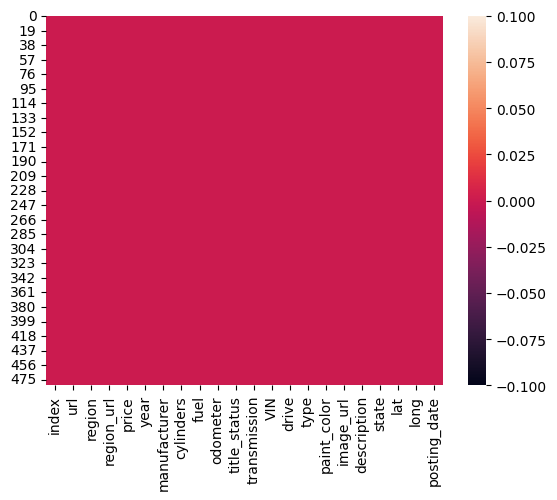

In [ ]:
sns.heatmap(df_cleaned.isnull());

In [ ]:
# check for duplicate entries
duplicate = df_cleaned.duplicated();
print(duplicate.sum());

# remove duplicates
df_cleaned.drop_duplicates(inplace=True);
dp1=df_cleaned.duplicated();
print(dp1.sum());

0
0


In [ ]:
# convert to lower case
df_cleaned['type']=df_cleaned['type'].str.lower();
print(df_cleaned['type']);

0      pickup
1      pickup
2      pickup
3      pickup
4      pickup
        ...  
478    pickup
479       suv
480     sedan
481     other
482    pickup
Name: type, Length: 483, dtype: object


<Axes: >

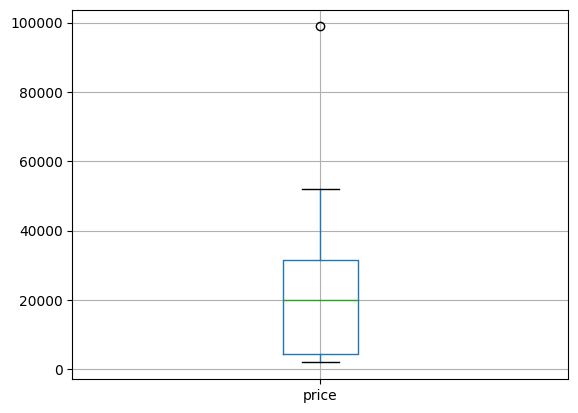

In [ ]:
df_cleaned.boxplot(column=["price"])

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [ ]:
lowprice, highprice=remove_outlier(df_cleaned["price"])
df_cleaned["price"]=np.where(df_cleaned["price"]>highprice,highprice,df_cleaned["price"])
df_cleaned["price"]=np.where(df_cleaned["price"]<lowprice,lowprice,df_cleaned["price"])

<Axes: >

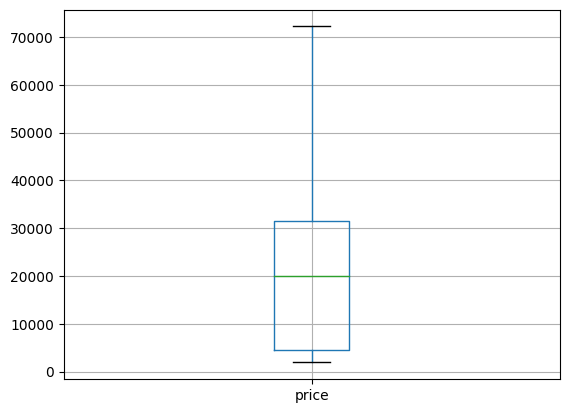

In [ ]:
df_cleaned.boxplot(column=["price"])

In [ ]:
df_cleaned = df_cleaned.copy().drop(['index'],axis=1)

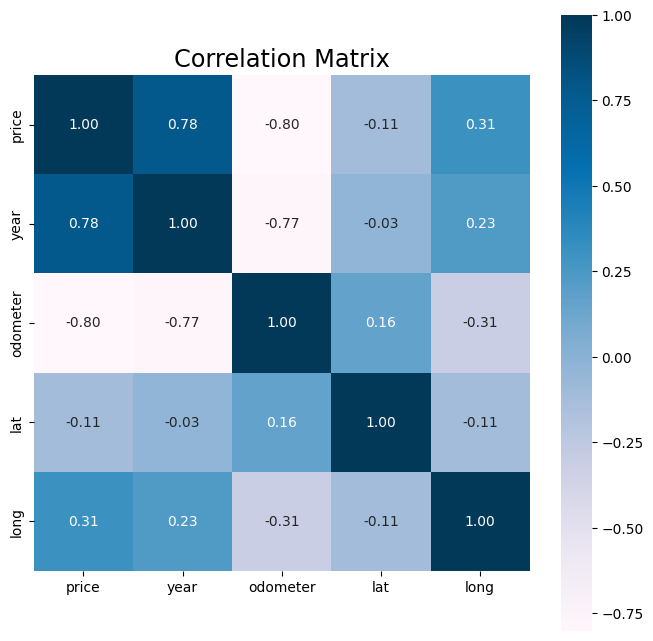

In [ ]:
dataCorr = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix', fontsize="xx-large")
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

## **Data Visualization**

<Axes: xlabel='manufacturer'>

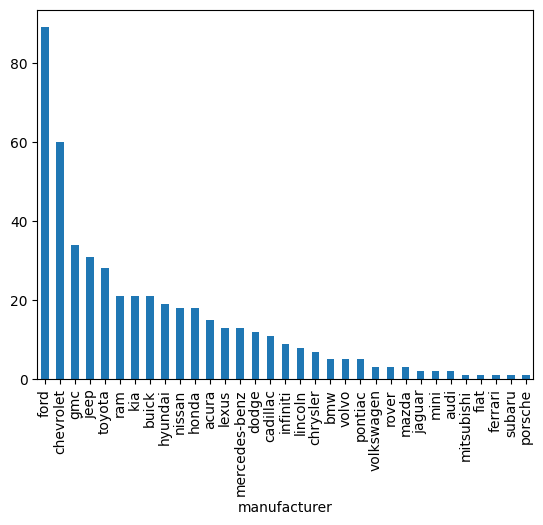

In [ ]:
df_cleaned['manufacturer'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

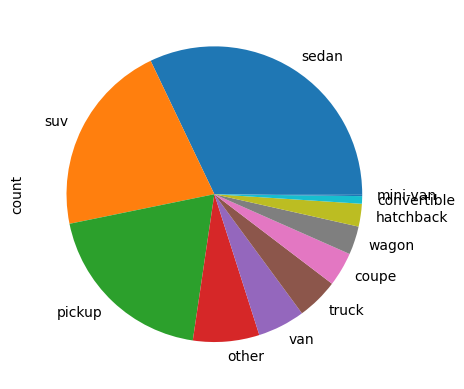

In [ ]:
df_cleaned['type'].value_counts().plot(kind='pie')

<Axes: xlabel='type', ylabel='price'>

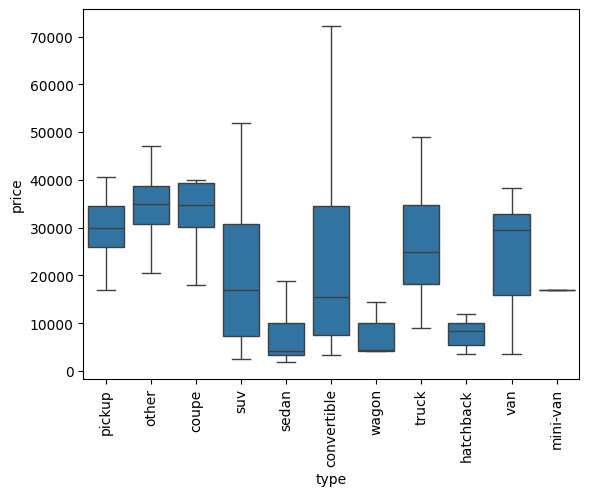

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='type', data=df_cleaned, showfliers=False)

<Axes: xlabel='year', ylabel='price'>

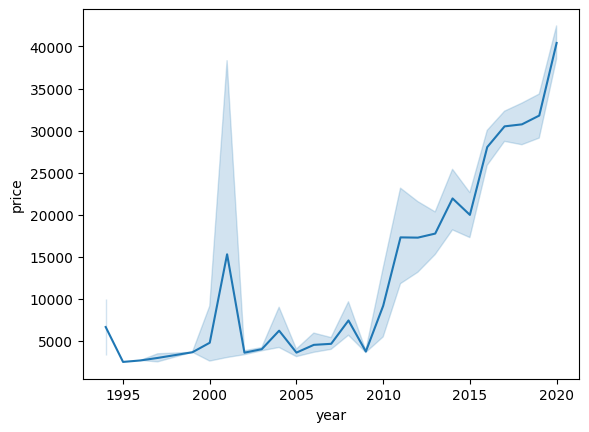

In [ ]:
sns.lineplot(x="year", y="price", data=df_cleaned)

<ipython-input-46-e95bcfdc2fd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['odometer'])


<Axes: xlabel='odometer', ylabel='Density'>

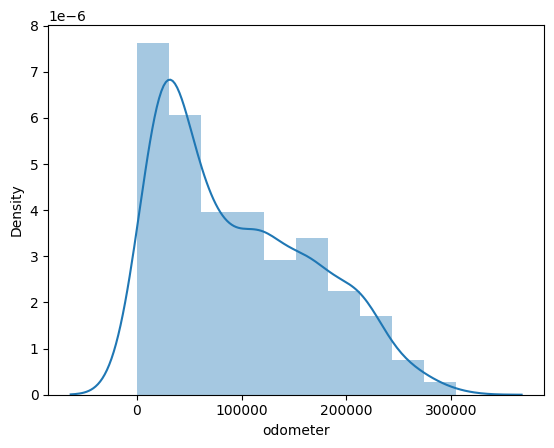

In [ ]:
sns.distplot(df_cleaned['odometer'])